In [72]:
import numpy as np
import pandas as pd
import cufflinks as cf
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

init_notebook_mode(connected=True)
cf.go_offline()
%config Completer.use_jedi = False

import requests
from bs4 import BeautifulSoup
import json

In [73]:
owid_df = pd.read_csv('./owid-covid-data.csv')
pd.set_option('display.max_columns', None)
owid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [74]:
country = owid_df['location'].unique()
print(len(country))
print(country)

233
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European Union' 'Faeroe Islands' 'Falkland Islands'
 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Gh

<AxesSubplot:xlabel='date'>

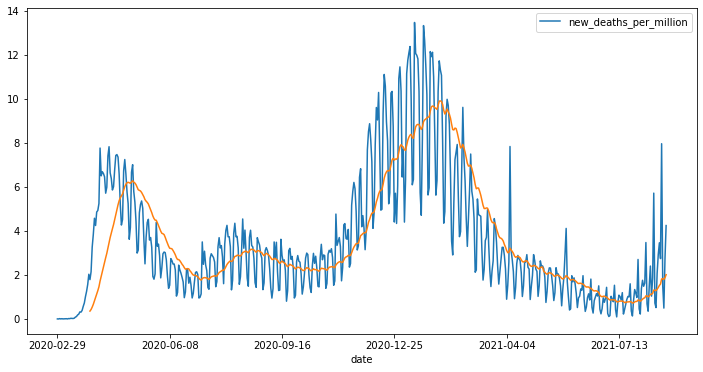

In [90]:
index = owid_df[owid_df['location'] == 'United States'].index
total_cases = owid_df[owid_df['location'] == 'United States'][['date','new_deaths_per_million']].dropna()
total_cases.set_index('date',inplace=True)

total_cases.plot(figsize=(12,6))
total_cases.rolling(window=30).mean()['new_deaths_per_million'].plot()
# total_cases = total_cases.asfreq('d')

In [98]:
total_cases.index

Index(['2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       ...
       '2021-08-15', '2021-08-16', '2021-08-17', '2021-08-18', '2021-08-19',
       '2021-08-20', '2021-08-21', '2021-08-22', '2021-08-23', '2021-08-24'],
      dtype='object', name='date', length=543)

In [91]:
# train split(0.8,0.2)
print(total_cases.info())
train_df = total_cases.iloc[:444]
test_df = total_cases.iloc[443:]

<class 'pandas.core.frame.DataFrame'>
Index: 543 entries, 2020-02-29 to 2021-08-24
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   new_deaths_per_million  543 non-null    float64
dtypes: float64(1)
memory usage: 8.5+ KB
None


# 時間序列模型Holt-Winters Model
https://www.elegantjbi.com/blog/what-is-the-holt-winters-forecasting-algorithm-and-how-can-it-be-used-for-enterprise-analysis.htm<br>
https://medium.com/analytics-vidhya/holt-winters-forecasting-13c2e60d983f<br>
https://zhuanlan.zhihu.com/p/375467370

C:\Users\Mashiro\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Mashiro\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation



99


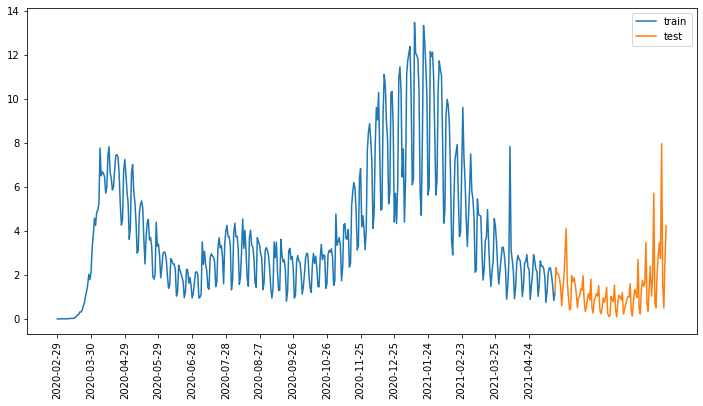

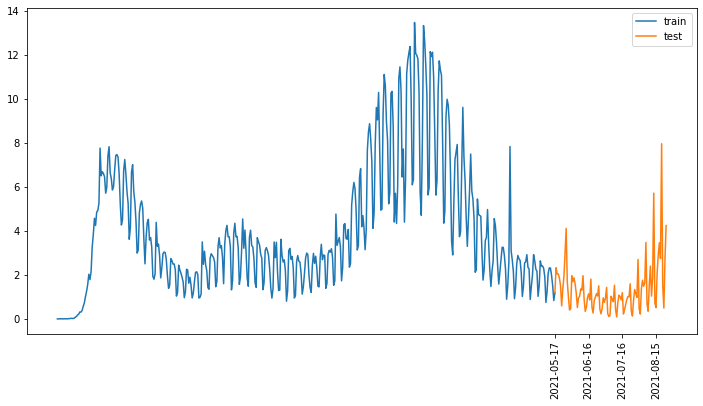

In [198]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

exp_smooth = ExponentialSmoothing(train_df['new_deaths_per_million'],trend='add',
                                  seasonal='add',seasonal_periods=14).fit()
# 預測日期長度
import datetime
d1 = datetime.datetime.strptime('2021-08-24', '%Y-%m-%d')
d2 = datetime.datetime.strptime('2021-05-17', '%Y-%m-%d')
delta = d1 - d2
# print(delta.days)

prediction = exp_smooth.forecast(100)

# 畫圖有bug
# train_df['new_deaths_per_million'].plot(figsize=(12,6))
# test_df['new_deaths_per_million'].plot()
# prediction.plot(xlim=['2020-09-09','2020-10-28'])

# train
plt.figure(figsize=(12,6))
plt.plot(train_df.index,train_df['new_deaths_per_million'],label="train")
plt.plot(test_df.index,test_df['new_deaths_per_million'],label="test")
plt.xticks(train_df.index[::30],  rotation='vertical')
plt.legend()
plt.show()

# test
plt.figure(figsize=(12,6))
plt.plot(train_df.index,train_df['new_deaths_per_million'],label="train")
plt.plot(test_df.index,test_df['new_deaths_per_million'],label="test")
plt.xticks(test_df.index[::30],  rotation='vertical')
plt.legend()
plt.show()

# prediction + test
# plt.figure(figsize=(12,6))
# plt.plot(test_df.index,test_df['new_deaths_per_million'],label="test")
# plt.plot(prediction.index,test_df['new_deaths_per_million'],label="prediction")
# plt.xticks(test_df.index[::30],  rotation='vertical')
# plt.legend()
# plt.show()

In [288]:
# datimeindex不能直接用來畫圖，需轉成str的index
from datetime import datetime

prediction_df = pd.DataFrame(prediction)
timestampStr = prediction_df.index.strftime("%Y-%m-%d")
print(timestampStr[:10])

prediction_df.reset_index()
prediction_df.rename(columns={0:'new_deaths_per_million'}, inplace=True)
prediction_df['date'] = timestampStr
prediction_df.set_index('date',inplace=True)
prediction_df[:10].index

Index(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27'],
      dtype='object')


Index(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27'],
      dtype='object', name='date')

# 預測死亡率和實際死亡率的比較

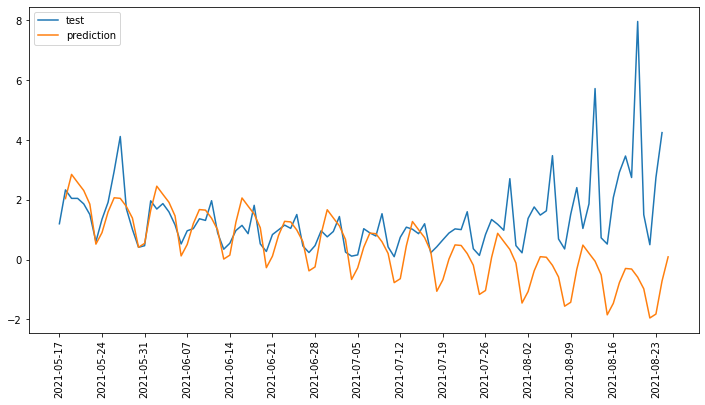

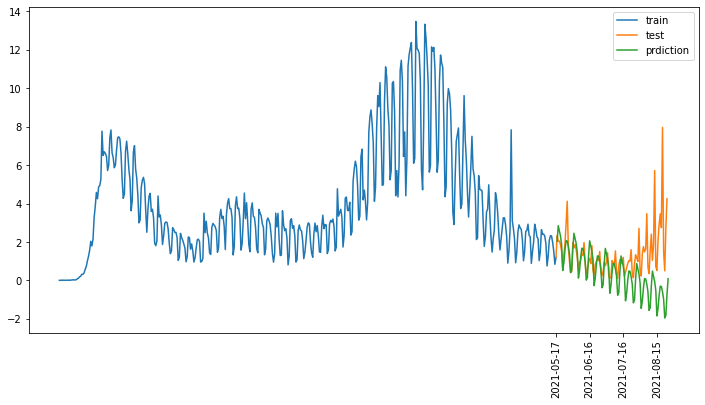

In [294]:
# 畫法1(bug:xtick只能擇一來更改...)
plt.figure(figsize=(12,6))
plt.plot(test_df.index,test_df['new_deaths_per_million'],label='test')
plt.plot(prediction_df.index,prediction_df['new_deaths_per_million'],label='prediction')
plt.xticks(test_df.index[::7],  rotation='vertical')
plt.legend()
plt.show()

# 畫法2(bug:不能改xlim且fig有時無法疊加...)
# test_df['new_deaths_per_million'].plot(figsize=(12,6))
# prediction_df['new_deaths_per_million'].plot()
# plt.legend()
# plt.show()

# 畫法3(bug:xtick只能擇一來更改...)
plt.figure(figsize=(12,6))
plt.plot(train_df.index,train_df['new_deaths_per_million'],label="train")
plt.plot(test_df.index,test_df['new_deaths_per_million'],label="test")
plt.plot(prediction_df.index,prediction_df['new_deaths_per_million'],label="prdiction")
plt.xticks(test_df.index[::30],  rotation='vertical')
plt.legend()
plt.show()

# 衡量Holt-Winters Model指標:MSE,MAE
MSE 可以評價資料的變化程度，MSE 的值越小，說明預測模型描述實驗資料具有更好的精確度。
https://staruphackers.com/%E4%BB%80%E9%BA%BC%E6%98%AF%E5%9D%87%E6%96%B9%E8%AA%A4%E5%B7%AE-mean-square-error-mse%EF%BC%9F/<br>
MAE同上。<br>
https://ithelp.ithome.com.tw/articles/10218198<br>
https://staruphackers.com/%E4%BB%80%E9%BA%BC%E6%98%AF%E5%B9%B3%E5%9D%87%E7%B5%95%E5%B0%8D%E8%AA%A4%E5%B7%AE-mean-absolute-error-mae%EF%BC%9F/<br>
RMSE的數值越大，表示我們預測的表現越差。<br>
https://ithelp.ithome.com.tw/articles/10218158

In [302]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('mse:',mean_squared_error(test_df,prediction_df))
print('mae:',mean_absolute_error(test_df,prediction_df))
print('rmse:',np.sqrt(mean_squared_error(test_df,prediction_df)))

mse: 3.2105245636527697
mae: 1.1707073938811716
rmse: 1.7917936721767855
